Data Exploration

In [1]:
import pandas as pd
import numpy as np
pd.options.mode.copy_on_write = True

In [2]:
df = pd.read_csv('customer.csv')

In [3]:
print("Seeing the first 10 lines of the data set \n")
print(df.head(10))
print('\n')
print("Counting the missing values in each collumn \n")
print(df.isnull().sum())
print('\n')
print("Data set info \n")
print(df.info())
print("\n")
print("Describe data \n")
print(df.describe())
print("\n")
print("Número de registros:", len(df))
print("Número de colunas:", len(df.columns))

Seeing the first 10 lines of the data set 

   Unnamed: 0        custid     sex is_employed   income      marital_status  \
0           7  000006646_03    Male        True  22000.0       Never married   
1           8  000007827_01  Female         NaN  23200.0  Divorced/Separated   
2           9  000008359_04  Female        True  21000.0       Never married   
3          10  000008529_01  Female         NaN  37770.0             Widowed   
4          11  000008744_02    Male        True  39000.0  Divorced/Separated   
5          15  000011466_01    Male         NaN  11100.0             Married   
6          17  000015018_01  Female        True  25800.0             Married   
7          19  000017314_02  Female         NaN  34600.0             Married   
8          20  000017383_04  Female        True  25000.0       Never married   
9          21  000017554_02    Male        True  31200.0             Married   

   health_ins                  housing_type  num_vehicles  age state_of_res

In [4]:
#1686/72458 -> 2%

df[df["housing_type"].isnull() == True]

# We took out all the lines that had Nan because they were the same in those 3 columns
df = df.dropna(subset=["housing_type"])
df[df["housing_type"].isnull() == True]

# There was still one missing value in the collumn recent_move_b so we replaced it with the mode
df[df["recent_move_b"].isnull() == True]
mode = df["recent_move_b"].mode()[0]
df["recent_move_b"] = df["recent_move_b"].fillna(mode)

In [5]:
for col in df.columns:
    print(col)
    print(pd.unique(df[col]))
    print(len(pd.unique(df[col])))
    print("\n")

Unnamed: 0
[    7     8     9 ... 99997 99998 99999]
70772


custid
['000006646_03' '000007827_01' '000008359_04' ... '001507219_01'
 '001513103_01' '001519624_01']
70772


sex
['Male' 'Female']
2


is_employed
[True nan False]
3


income
[22000. 23200. 21000. ... 25110. 18010. 26850.]
4423


marital_status
['Never married' 'Divorced/Separated' 'Widowed' 'Married']
4


health_ins
[ True False]
2


housing_type
['Homeowner free and clear' 'Rented' 'Homeowner with mortgage/loan'
 'Occupied with no rent']
4


num_vehicles
[0. 2. 1. 5. 3. 4. 6.]
7


age
[ 24  82  31  93  67  76  26  73  27  54  61  64  55  65  33  47  68  46
  58  43  41  62  21  78  32  59  29  70  30  28  86  35  34  40  72  60
  25  79  22  42  44  81  50  45  63  57  39  71  38  49  69  37  66  53
  36  23  75  88  51  85  52  83  77  56  48 100  74  89  80  84   0  87
 120  91 110 114  94  90  96  92  95]
81


state_of_res
['Alabama' 'Alaska' 'Arizona' 'Arkansas' 'California' 'Colorado'
 'Connecticut' 'Delaware' 'Dist

In [6]:
# Drop unnamed
df = df.drop(columns=['Unnamed: 0'])

# Put custid as dataframe index
df = df.drop(columns=['custid'])
#df = df.set_index('custid')

# Sex
df = pd.get_dummies(df, columns=['sex'], drop_first=True)
df['sex_Male'] = df['sex_Male'].map({False: 0, True: 1})

# Is_employed
df['is_employed'] = df['is_employed'].map({False: 0, True: 1})

# Health_ins
df['health_ins'] = df['health_ins'].map({False: 0, True: 1})

# Mudar o Número de veículos para type inteiro
df['num_vehicles'] = df['num_vehicles'].astype(int)

# Gas_usage 1 2 3 to zero and all to int
df['gas_usage'] = df['gas_usage'].astype(int)
df['gas_usage'] = df['gas_usage'].replace([1, 2, 3], 0)

# Recent_move_b
df['recent_move_b'] = df['recent_move_b'].map({'F': 0, 'T': 1})

# Marital status
df = pd.get_dummies(df, columns=['marital_status'], drop_first=True)
df = pd.get_dummies(df, columns=['housing_type'], drop_first=True)
df = pd.get_dummies(df, columns=['state_of_res'], drop_first=True)

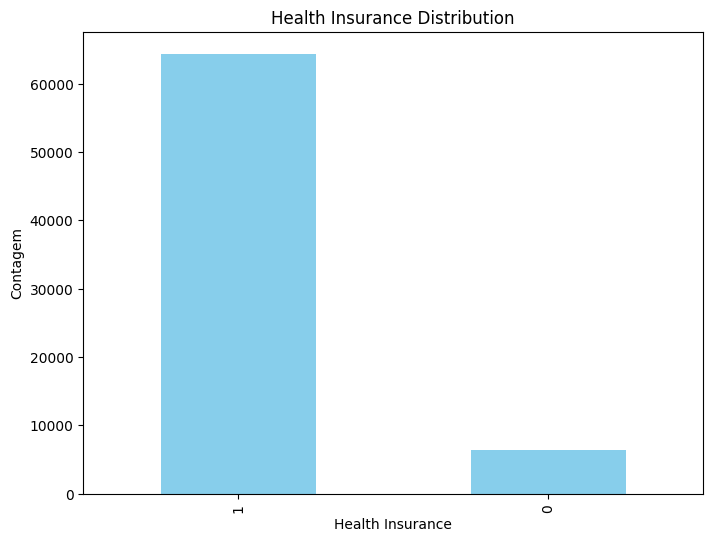

health_ins
1    64339
0     6433
Name: count, dtype: int64


In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

health_ins_distribution = df['health_ins'].value_counts()

plt.figure(figsize=(8, 6))
health_ins_distribution.plot(kind='bar', color='skyblue')
plt.title('Health Insurance Distribution')
plt.xlabel('Health Insurance')
plt.ylabel('Contagem')
plt.show()

print(health_ins_distribution)

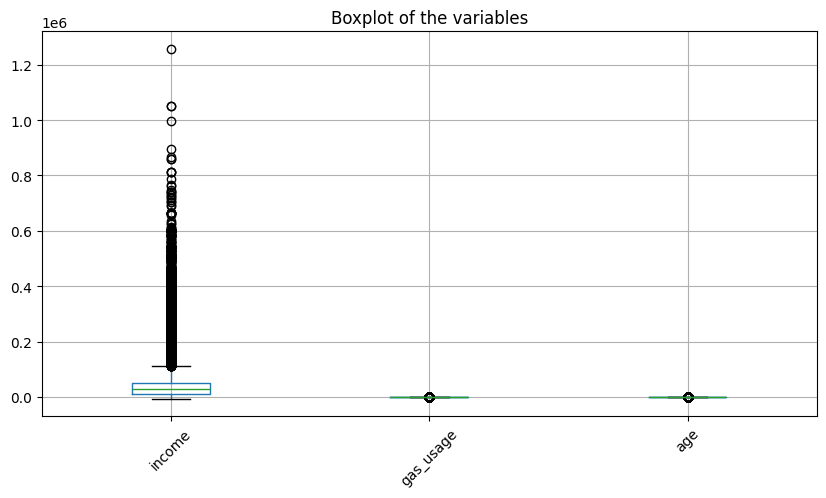

In [8]:
df2 = df[['income','gas_usage','age']]
plt.figure(figsize=(10, 5))
df2.boxplot()
plt.title('Boxplot of the variables')
plt.xticks(rotation=45)
plt.show()

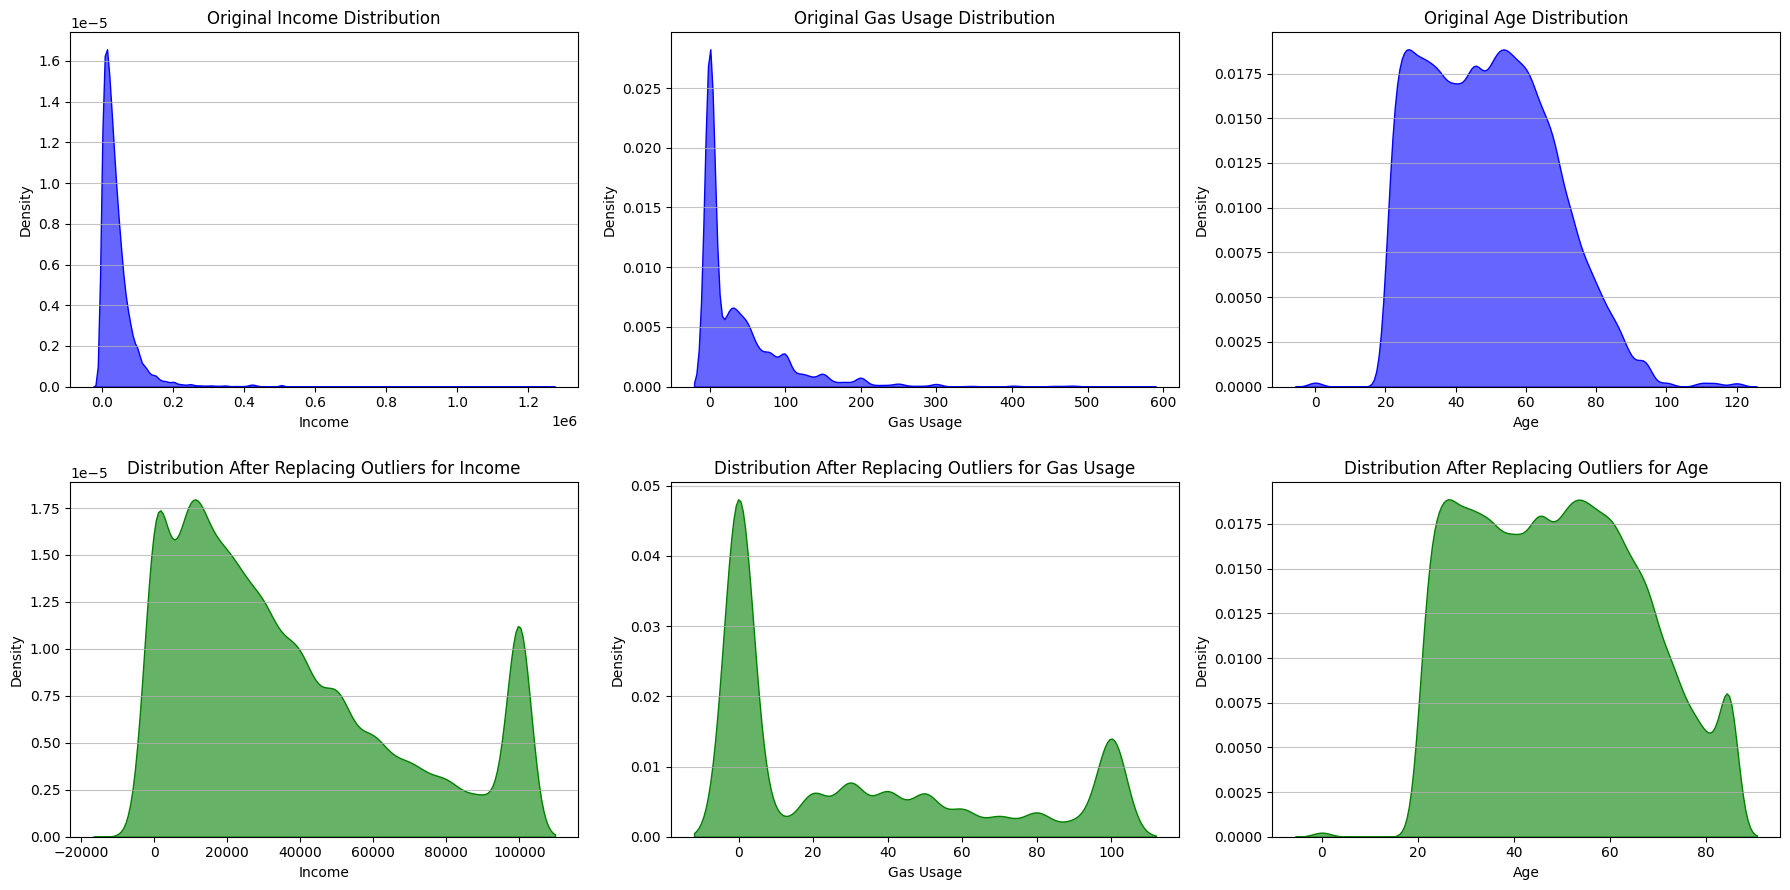

In [9]:
plt.figure(figsize=(18, 9))  

# Subplot 1: Original Income Distribution
plt.subplot(2, 3, 1)
sns.kdeplot(df['income'], fill=True, color='blue', alpha=0.6)
plt.title('Original Income Distribution')
plt.xlabel('Income')
plt.ylabel('Density')
plt.grid(axis='y', alpha=0.75)

# Subplot 2: Original Gas Usage Distribution
plt.subplot(2, 3, 2)
sns.kdeplot(df['gas_usage'], fill=True, color='blue', alpha=0.6)
plt.title('Original Gas Usage Distribution')
plt.xlabel('Gas Usage')
plt.ylabel('Density')
plt.grid(axis='y', alpha=0.75)

# Subplot 3: Original Age Distribution
plt.subplot(2, 3, 3)
sns.kdeplot(df['age'], fill=True, color='blue', alpha=0.6)
plt.title('Original Age Distribution')
plt.xlabel('Age')
plt.ylabel('Density')
plt.grid(axis='y', alpha=0.75)

# Replace outliers for income, age, and gas usage
df['income'] = df['income'].where(df['income'] <= 0.1 * 10**6, 0.1 * 10**6)
df['age'] = df['age'].where(df['age'] <= 85, 85)
df['gas_usage'] = df['gas_usage'].where(df['gas_usage'] <= 100, 100)

# Subplot 4: Distribution After Replacing Outliers for Income
plt.subplot(2, 3, 4)
sns.kdeplot(df['income'], fill=True, color='green', alpha=0.6)
plt.title('Distribution After Replacing Outliers for Income')
plt.xlabel('Income')
plt.ylabel('Density')
plt.grid(axis='y', alpha=0.75)

# Subplot 5: Distribution After Replacing Outliers for Gas Usage
plt.subplot(2, 3, 5)
sns.kdeplot(df['gas_usage'], fill=True, color='green', alpha=0.6)
plt.title('Distribution After Replacing Outliers for Gas Usage')
plt.xlabel('Gas Usage')
plt.ylabel('Density')
plt.grid(axis='y', alpha=0.75)

# Subplot 4«6: Distribution After Replacing Outliers for Age
plt.subplot(2, 3, 6)
sns.kdeplot(df['age'], fill=True, color='green', alpha=0.6)
plt.title('Distribution After Replacing Outliers for Age')
plt.xlabel('Age')
plt.ylabel('Density')
plt.grid(axis='y', alpha=0.75)

plt.tight_layout()  
plt.show()


In [ ]:
from sklearn.impute import KNNImputer

# Create KNN Imputer and Impute the is_employed variable
imputer = KNNImputer(n_neighbors=3)
df_imputed = df.copy()
df_imputed[['is_employed']] = imputer.fit_transform(df_imputed[['is_employed', 'income', 'num_vehicles']])[:, 0:1]

# Display the DataFrame after imputation
print("DataFrame after KNN Imputation on 'is_employed':")
print(df_imputed)

In [46]:
# Data scalling 
from sklearn import preprocessing

# Initialize MinMaxScaler
min_max_scaler = preprocessing.MinMaxScaler()

# Fit and transform only the numeric columns
df_minmax_scaled = min_max_scaler.fit_transform(df_imputed)

# Create a new DataFrame with the scaled values and the same column names
df_minmax = pd.DataFrame(df_minmax_scaled)

# Print the scaled DataFrame
print(df_minmax)

        0         1    2         3         4         5    6    7    8    9   \
0      1.0  0.270346  1.0  0.000000  0.282353  0.103726  1.0  0.4  0.0  1.0   
1      1.0  0.281572  1.0  0.000000  0.964706  0.103726  0.0  1.0  1.0  0.0   
2      1.0  0.260992  1.0  0.333333  0.364706  0.103726  0.4  0.4  0.0  0.0   
3      1.0  0.417867  1.0  0.166667  1.000000  0.103726  1.0  0.2  0.0  0.0   
4      1.0  0.429373  1.0  0.333333  0.788235  0.103726  0.0  0.2  0.0  1.0   
...    ...       ...  ...       ...       ...       ...  ...  ...  ...  ...   
70767  1.0  0.859682  1.0  0.333333  0.376471  0.000000  0.7  0.8  0.0  0.0   
70768  1.0  0.237605  0.0  0.166667  0.294118  0.000000  0.1  0.6  0.0  0.0   
70769  1.0  0.259121  1.0  0.166667  1.000000  0.000000  1.0  1.0  0.0  0.0   
70770  1.0  0.766137  1.0  0.333333  0.588235  0.000000  0.9  0.4  0.0  1.0   
70771  1.0  0.272217  0.0  0.166667  0.717647  0.000000  0.5  1.0  0.0  0.0   

       ...   56   57   58   59   60   61   62   63 

In [47]:
correlation_matrix = df_minmax.corr().abs()
correlation_matrix.style.background_gradient(cmap='coolwarm')

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65
0,1.000000,0.410426,0.147822,0.060290,0.068132,0.041811,0.010736,0.000273,0.012096,0.115089,0.017842,0.049915,0.013886,0.059220,0.030147,0.057117,0.000390,0.003730,0.005591,0.028215,0.015436,0.002679,0.000874,0.000728,0.013570,0.008258,0.005490,0.000321,0.002120,0.006665,0.015045,0.012641,0.001243,0.009660,0.009509,0.008190,0.016404,0.005613,0.016403,0.000629,0.008449,0.008536,0.010687,0.005479,0.011033,0.000930,0.004928,0.010195,0.003106,0.006258,0.004608,0.000552,0.000395,0.009795,0.001255,0.005069,0.007461,0.006944,0.015362,0.000980,0.009939,0.006348,0.002772,0.002736,0.019001,0.002293
1,0.410426,1.000000,0.171043,0.089720,0.044461,0.002314,0.058592,0.000088,0.030278,0.233346,0.181574,0.159396,0.066014,0.210861,0.049005,0.166567,0.005193,0.008894,0.016344,0.013119,0.017670,0.029385,0.001648,0.022275,0.036274,0.009336,0.005964,0.007178,0.008018,0.010365,0.003111,0.003897,0.022948,0.020784,0.000002,0.034091,0.040074,0.013703,0.017382,0.020583,0.007670,0.000147,0.005138,0.010295,0.012255,0.036652,0.016132,0.016080,0.017081,0.001512,0.013368,0.017448,0.006366,0.006921,0.007018,0.012559,0.000286,0.011976,0.009234,0.001624,0.003046,0.021688,0.017243,0.015165,0.004479,0.003975
2,0.147822,0.171043,1.000000,0.036542,0.167483,0.030619,0.051519,0.005953,0.058888,0.047108,0.100821,0.122619,0.054976,0.107773,0.030010,0.148150,0.017492,0.000163,0.003935,0.012813,0.006639,0.016400,0.003416,0.007877,0.039627,0.031283,0.016323,0.002514,0.014638,0.000090,0.015525,0.001956,0.011254,0.012338,0.002619,0.011543,0.032308,0.024998,0.022084,0.011852,0.001741,0.001965,0.006729,0.006243,0.004436,0.008267,0.001756,0.021638,0.022795,0.004939,0.019136,0.016769,0.006311,0.024059,0.010367,0.008658,0.005712,0.003029,0.081876,0.002439,0.009850,0.001498,0.013418,0.011427,0.019417,0.004136
3,0.060290,0.089720,0.036542,1.000000,0.125752,0.014439,0.118837,0.001894,0.119345,0.058463,0.215738,0.051290,0.145558,0.281192,0.040432,0.315357,0.004983,0.002131,0.003682,0.063139,0.017803,0.004205,0.004397,0.040495,0.033701,0.004588,0.018349,0.011661,0.016819,0.006628,0.009973,0.019028,0.000539,0.010508,0.001820,0.000511,0.024797,0.004626,0.009687,0.000413,0.001433,0.017476,0.007250,0.004903,0.009988,0.012780,0.009148,0.129034,0.011273,0.003554,0.003011,0.000410,0.011583,0.015672,0.005568,0.006008,0.009670,0.014959,0.017741,0.030200,0.003914,0.020267,0.017611,0.006402,0.007745,0.006755
4,0.068132,0.044461,0.167483,0.125752,1.000000,0.028309,0.043916,0.002037,0.215732,0.039822,0.159491,0.465556,0.354019,0.032539,0.003064,0.255868,0.012788,0.005158,0.001208,0.028118,0.008615,0.013302,0.006388,0.009953,0.036056,0.009293,0.004012,0.003252,0.003679,0.003662,0.011058,0.000907,0.005522,0.008584,0.013531,0.002566,0.003884,0.006923,0.002694,0.006015,0.000983,0.007249,0.000631,0.003122,0.007932,0.003358,0.001063,0.002096,0.003087,0.002090,0.009281,0.001908,0.005485,0.013225,0.000720,0.002383,0.006448,0.011101,0.032344,0.020557,0.006197,0.000359,0.007311,0.010342,0.002725,0.004261
5,0.041811,0.002314,0.030619,0.014439,0.028309,1.000000,0.074959,0.006101,0.008519,0.005147,0.010684,0.031301,0.012224,0.037525,0.008742,0.088233,0.054115,0.095957,0.094036,0.796585,0.100692,0.099153,0.060734,0.055925,0.171614,0.072135,0.076687,0.075393,0.027872,0.097592,0.095537,0.093571,0.100212,0.100791,0.074301,0.099962,0.093711,0.068465,0.101054,0.093913,0.098858,0.063060,0.080973,0.095237,0.072445,0.078560,0.080539,0.108543,0.063991,0.056272,0.048871,0.099692,0.100660,0.022613,0.063763,0.101572,0.058471,0.097284,0.307399,0.094573,0.053105,0.083321,0.093013,0.081268,0.100715,0.050080
6,0.010736,0.058592,0.051519,0.118837,0.043916,0.074959,1.000000,0.002072,0.084076,0.006000,0.080421,0.051658,0.011757,0.146701,0.016821,0.201504,0.016758,0.029545,0.001784,0.011450,0.001889,0.006138,0.002873,0.000747,0.184705,0.014256

In [48]:
# Notas:
# 1- A imputacao esta a demorar 1m30 por causa de ser um data set muito grande, seria mais rapido fazer pela moda mas menos eficaz
# 2- Tive de criar dummies para tudo e agora tem mesmo muitas colunas mas era a unica maneira que arranjei de fazer a correlacao. 
# (Tenho de ver isso melhor e se ha outra maneira)
# Removi o custid em vez de o por como indice mas deixei a linha caso queiramos mudar again 

'''
With only 49 unique short integers, it's possible that code_column represents categorical information—like a set of predefined categories, statuses, or codes that could provide insight into the types of health insurance claims, policy categories, or regional designations in the data.

You might try:

    Mapping Values: Print out the unique values to see if they form a pattern (e.g., sequential or grouped by range).

    Frequency Analysis: Count the occurrences of each unique integer to see if they align with other features in the data, such as specific types of insurance plans or claim types.

    Cross-reference: If you have any other resources or metadata about the dataset, these values may correspond to known codes used in health insurance datasets.

If the column remains ambiguous after analysis and appears uncorrelated with other important variables, then it might be safe to drop. However, categorical columns with limited unique values often add context that can be beneficial in health insurance datasets.
'''

"\nWith only 49 unique short integers, it's possible that code_column represents categorical information—like a set of predefined categories, statuses, or codes that could provide insight into the types of health insurance claims, policy categories, or regional designations in the data.\n\nYou might try:\n\n    Mapping Values: Print out the unique values to see if they form a pattern (e.g., sequential or grouped by range).\n\n    Frequency Analysis: Count the occurrences of each unique integer to see if they align with other features in the data, such as specific types of insurance plans or claim types.\n\n    Cross-reference: If you have any other resources or metadata about the dataset, these values may correspond to known codes used in health insurance datasets.\n\nIf the column remains ambiguous after analysis and appears uncorrelated with other important variables, then it might be safe to drop. However, categorical columns with limited unique values often add context that can be 